In [34]:
"""Name : Sejal Bhausaheb Talekar
   Roll No : 2331030
   batch B
   Assignment 5 Data Analytics II
1. Implement logistic regression using Python/R to perform classification on
Social_Network_Ads.csv dataset.
2. Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate, Precision, Recall
on the given dataset."""

'Name : Sejal Bhausaheb Talekar\n   Roll No : 2331030\n   batch B\n   Assignment 5 Data Analytics II\n1. Implement logistic regression using Python/R to perform classification on\nSocial_Network_Ads.csv dataset.\n2. Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate, Precision, Recall\non the given dataset.'

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [36]:
df = pd.read_csv("Social_Network_Ads.csv")

In [37]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [38]:
df.shape

(400, 5)

In [39]:
df[:7]

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0


In [40]:
df.drop(['User ID'],axis=1 ,inplace=True)

In [41]:
df

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [42]:
df.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [43]:
df.Gender.value_counts()

Female    204
Male      196
Name: Gender, dtype: int64

In [44]:
df.dtypes

Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [45]:
df.isnull().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [46]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


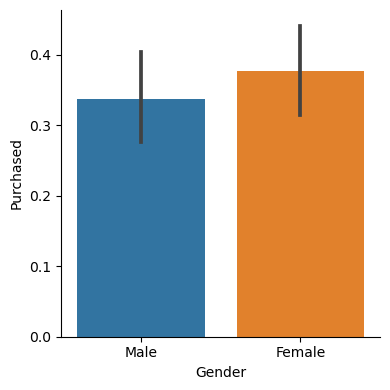

In [96]:

g = sns.catplot(x="Gender", y="Purchased", data=df, kind="bar", height=4) 

In [98]:
m2 = pd.crosstab(df.Gender , df.Purchased , normalize ="index")

In [99]:
print(m2*100)

Purchased          0          1
Gender                         
Female     62.254902  37.745098
Male       66.326531  33.673469


Purchased          0          1
Gender                         
Female     62.254902  37.745098
Male       66.326531  33.673469


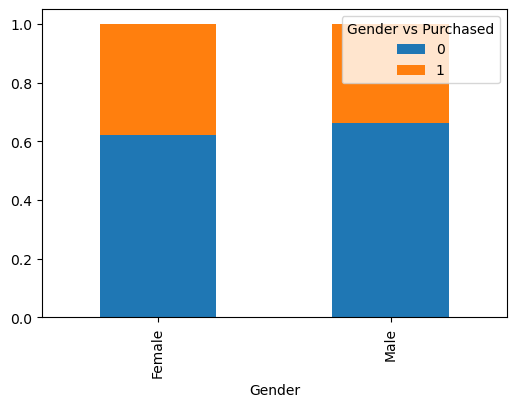

In [104]:
m2 = pd.crosstab(df.Gender, df.Purchased, normalize='index')
print(m2*100)
m2.plot.bar(figsize=(6,4),stacked=True)
plt.legend(title='Gender vs Purchased', loc='upper right')
plt.show()

(3, 3)


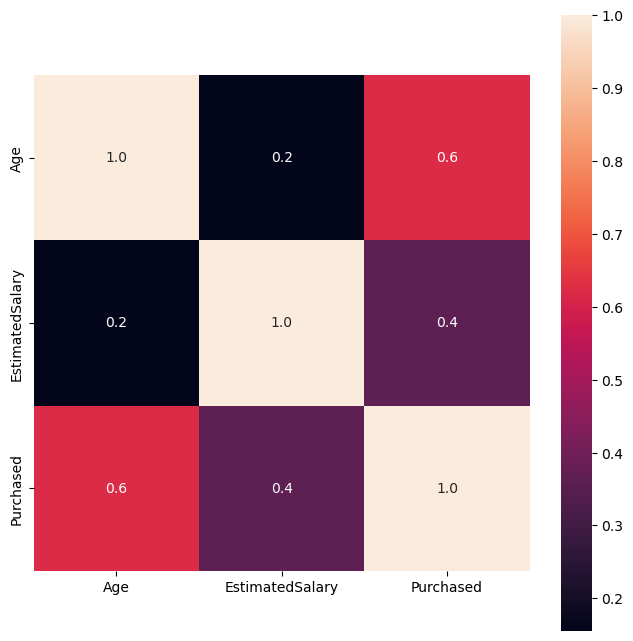

In [105]:
corr = df.corr()
print(corr.shape)
plt.figure(figsize=(8,8))
sns.heatmap(corr, annot=True,square=True,fmt ='.1f')
plt.show()

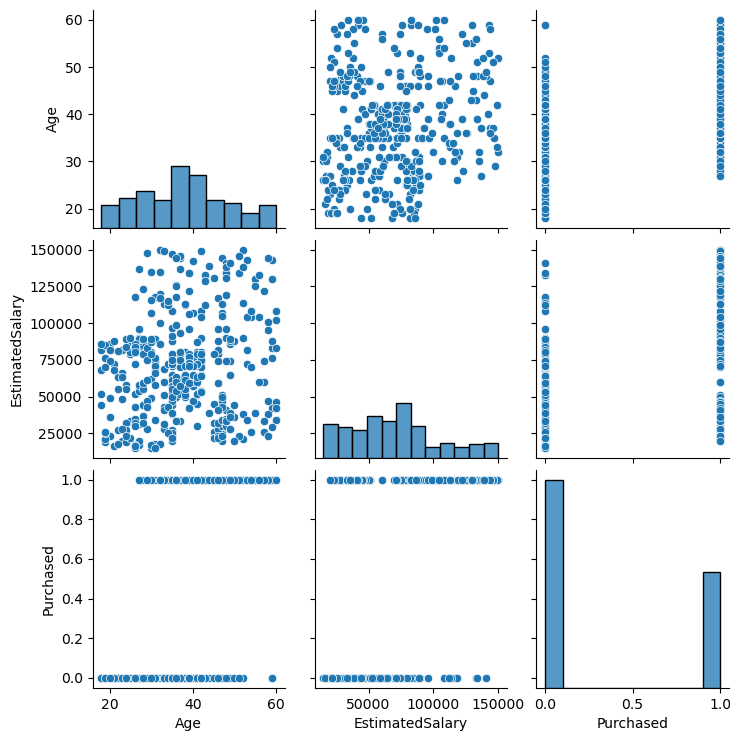

In [106]:
sns.pairplot(df)

In [1]:
x=df.drop(['Gender','Purchased'],axis=1)
y= df['Purchased']
x.head()
y.head()

NameError: name 'df' is not defined

In [108]:
from sklearn.model_selection import train_test_split
# Shuffle and split the data into training and testing subsets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)

# Success
print("Training and testing split was successful.")

Training and testing split was successful.


In [109]:
from sklearn.linear_model import LogisticRegression
basemodel= LogisticRegression()
basemodel.fit(x_train,y_train)
print("Training accuracy:", basemodel.score(x_train,y_train)*100)

Training accuracy: 64.0625


In [110]:
y_predict= basemodel.predict(x_test)
print("Testing accuracy:", basemodel.score(x_test,y_test)*100)


Testing accuracy: 65.0


In [111]:
# normalization
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()


In [112]:
x=df[['Age','EstimatedSalary']]
x_scaled= scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state = 42)
print("Training and testing split was successful.")

Training and testing split was successful.


In [113]:
model= LogisticRegression()
model.fit(x_train,y_train)
y_predict= model.predict(x_test)
print("Training accuracy:", model.score(x_train,y_train)*100)
print("Testing accuracy:", model.score(x_test,y_test)*100)

Training accuracy: 80.9375
Testing accuracy: 87.5
